In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import least_squares, curve_fit

%matplotlib inline

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/'

data = pd.read_csv(workdir + '20230516_mef1uM_titri.csv')
# for name in data.columns[2:]:
#     x = data[name][450-250:550-250]  - data[data.columns[1]][450-250:550-250]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_1uM = []
abs_1uM.append(data.iloc[336-250, 2])
for i in range(int(len(data.iloc[336-250, 3:])/3)):
    x = data.iloc[336-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_1uM.append(sum(x)/3)
abs_1uM = abs_1uM[0:16]

abs_1uM_a = [data.iloc[336-250, 2]].extend(data.iloc[336-250, 3::3].tolist())
abs_1uM_b = [data.iloc[336-250, 2]].extend(data.iloc[336-250, 3+1::3].tolist())
abs_1uM_c = [data.iloc[336-250, 2]].extend(data.iloc[336-250, 3+2::3].tolist())
print(data.iloc[336-250, 0])
print(len(abs_1uM))
print(abs_1uM_a)


data = pd.read_csv(workdir + '20230515_mef2uM_titri.csv')
# for name in data.columns[2:]:
#     x = data[name][250:350]  - data[data.columns[1]][250:350]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_2uM = data.iloc[336-200, 2:]
abs_2uM = data.iloc[336-200, 2:][0:19]

data2 = pd.read_csv(workdir + '20230515_mef2uM_titri2.csv')
abs_2uM2 = data2.iloc[336-200, 2:]

print(data2.iloc[336-200, 0])
print(len(abs_2uM))


data = pd.read_csv(workdir + '20230516_mef5uM_titri.csv')
# for name in data.columns[2:]:
#     x = data[name][510:610]  - data[data.columns[1]][510:610]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
abs_5uM = []
abs_5uM.append(data.iloc[336-250, 2])
for i in range(int(len(data.iloc[336-250, 3:])/3)):
    x = data.iloc[336-250, 3+i*3:3+i*3+3]
    #print(x)
    abs_5uM.append(sum(x)/3)
abs_5uM = abs_5uM[0:12]
abs_5uM_a = [data.iloc[336-250, 2]].extend(data.iloc[336-250, 3::3].tolist())
abs_5uM_b = [data.iloc[336-250, 2]].extend(data.iloc[336-250, 3+1::3].tolist())
abs_5uM_c = [data.iloc[336-250, 2]].extend(data.iloc[336-250, 3+2::3].tolist())
print(data.iloc[336-250, 0])
print(len(abs_5uM))

336
16
None
336
19
336
12


16


(-0.05, 0.75)

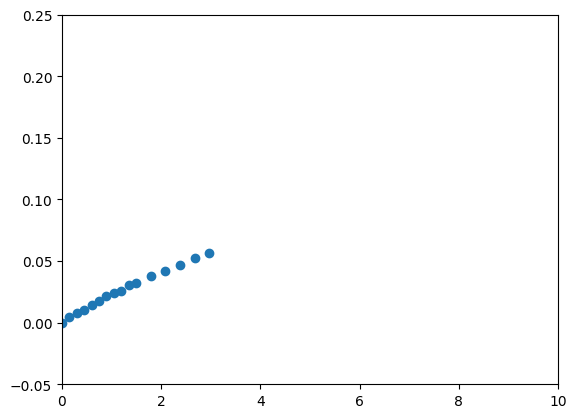

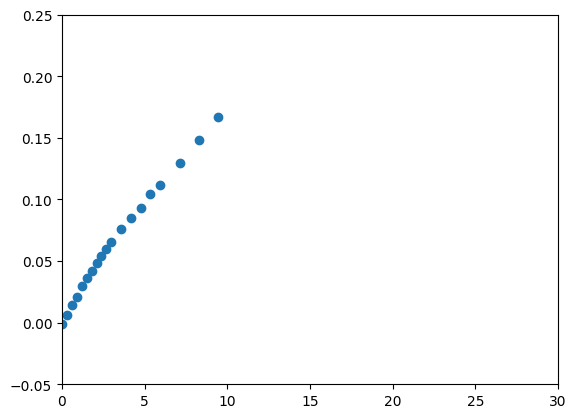

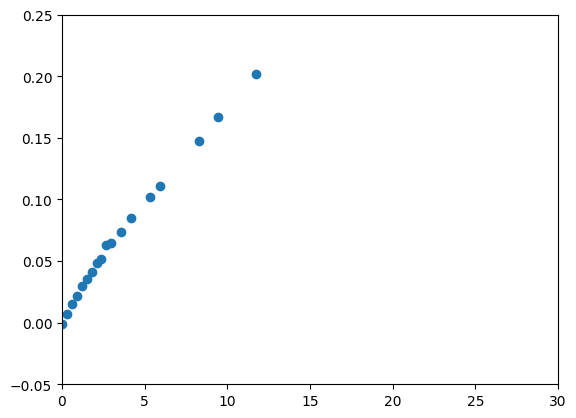

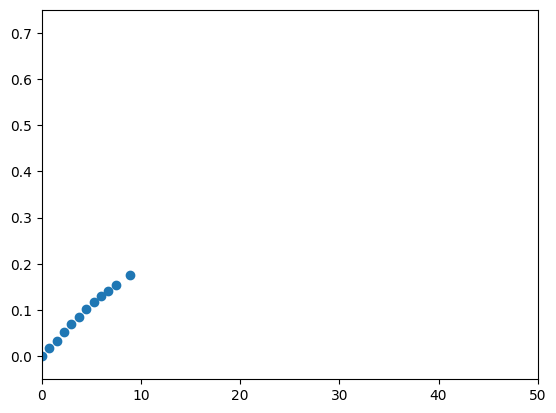

In [134]:
adds_1uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40][0:16]
print(len(adds_1uM))
conc_1uM = [x*300/(2000+x) for x in adds_1uM]
prot_conc_1uM = [1*2000/(2000+x) for x in adds_1uM]

fig,ax = plt.subplots()
ax.scatter(conc_1uM, abs_1uM)
plt.xlim([0, 10])
plt.ylim([-0.05, 0.25])

adds_2uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 40][0:19]
conc_2uM = [x*600/(2000+x) for x in adds_2uM]
prot_conc_2uM = [2*2000/(2000+x) for x in adds_2uM]

fig,ax = plt.subplots()
ax.scatter(conc_2uM, abs_2uM)
plt.xlim([0, 30])
plt.ylim([-0.05, 0.25])

adds_2uM2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 18, 20, 28, 32, 40]
conc_2uM2 = [x*600/(2000+x) for x in adds_2uM2]
prot_conc_2uM2 = [2*2000/(2000+x) for x in adds_2uM2]

fig,ax = plt.subplots()
ax.scatter(conc_2uM2, abs_2uM2)
plt.xlim([0, 30])
plt.ylim([-0.05, 0.25])



adds_5uM = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40][0:12]
conc_5uM = [x*1500/(2000+x) for x in adds_5uM]
prot_conc_5uM = [5*2000/(2000+x) for x in adds_5uM]

fig,ax = plt.subplots()
ax.scatter(conc_5uM, abs_5uM)
plt.xlim([0, 50])
plt.ylim([-0.05, 0.75])

In [137]:
def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))

def res_float_nir(x):
    rs = []
    rs.extend(abs_1uM[i] - abs_1uM[0] - x[3]*conc_1uM[i] - x[0]*pl_stoich(1*2000/(2000+ adds_1uM[i]), conc_1uM[i], x[1], x[2]) for i in range(len(conc_1uM)) )
    rs.extend(abs_2uM[i] - abs_2uM[0] - x[4]*conc_2uM[i] - x[0]*pl_stoich(2*2000/(2000+ adds_2uM[i]), conc_2uM[i], x[1], x[2]) for i in range(len(conc_2uM)) )
    #rs.extend(abs_5uM[i] - abs_5uM[0] - x[5]*conc_5uM[i] - x[0]*pl_stoich(5*2000/(2000+ adds_5uM[i]), conc_5uM[i], x[1], x[2]) for i in range(len(conc_5uM)) )

    return rs


In [146]:
res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])
#res_nir = least_squares(res_float_nir, np.array([.002, 1, 1, .007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001), (.01,50,3, .1,.1)])

x = res_nir.x  # fit parameters
x_orig = x

print('Fit of full data from Science paper:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x_orig[0],
      '\nKd (uM)=', x_orig[1],
      '\nN(stoichiometry)=', x_orig[2],
      '\nEpsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)=', x_orig[3],
      '\nEpsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)=', x_orig[4],
      #'\nEpsilon of Apx @ 305 nm and c=20uM (M^-1 cm^-1)=', x_orig[5],
      )

#How to compute standard deviation errors.
#https://stackoverflow.com/questions/42388139/how-to-compute-standard-deviation-errors-with-scipy-optimize-least-squares
print(res_nir.x)

#J = res_nir.jac
#cov = np.linalg.inv(J.T.dot(J))
#var = np.sqrt(np.diagonal(cov))
#print(var)

# import scipy.linalg as linalg
# U, s, Vh = linalg.svd(res_nir.jac, full_matrices=False)
# tol = np.finfo(float).eps*s[0]*max(res_nir.jac.shape)
# w = s > tol
# cov = (Vh[w].T/s[w]**2) @ Vh[w]  # robust covariance matrix
# cov = linalg.inv(res_nir.jac.T @ res_nir.jac)  
# perr = np.sqrt(np.diag(cov))  
# print(perr)

# chi2dof = np.sum(res_nir.fun**2)/(res_nir.fun.size - res_nir.x.size)
# cov *= chi2dof
# perr = np.sqrt(np.diag(cov)) 
# print(perr)

Fit of full data from Science paper:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= 0.009999999999999998 
Kd (uM)= 0.10021622123106809 
N(stoichiometry)= 0.8987219531523958 
Epsilon of Apx @ 305 nm and c=5 uM (M^-1 cm^-1)= 0.015539822744827663 
Epsilon of Apx @ 305 nm and c=10 uM (M^-1 cm^-1)= 0.015514976458276252
[0.01       0.10021622 0.89872195 0.01553982 0.01551498 0.007     ]


([<matplotlib.axis.XTick at 0x7fc081c90c10>,
 <a list of 5 Text major ticklabel objects>)

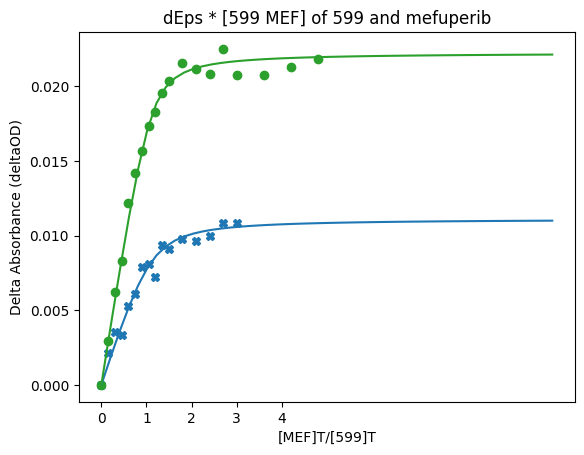

In [149]:
dePL_1 = [abs_1uM[i] - abs_1uM[0] - x[3] * conc_1uM[i] for i in range(len(conc_1uM))]
dePL_2 = [abs_2uM[i] - abs_2uM[0] - x[4] * conc_2uM[i] for i in range(len(conc_2uM))]
#dePL_2_2 = [abs_2uM2[i] - abs_2uM2[0] - x[3] * conc_2uM2[i] for i in range(len(conc_2uM2))]
#dePL_5 = [abs_5uM[i] - abs_5uM[0] - x[5] * conc_5uM[i] for i in range(len(conc_5uM))]


plt.figure()
plt.plot([300*add/(2000*1) for add in adds_1uM], dePL_1, 'X', label='[ABLER]T = 1 uM', color='tab:blue')
plt.plot([600*add/(2000*2) for add in adds_2uM], dePL_2, 'o', label='[ABLER]T = 2 uM', color='tab:green' )
#plt.plot([600*add/(500*8) for add in adds_2uM2], dePL_2_2, 'o', label='[ABLER]T = 2-2 uM' )
#plt.plot([1500*add/(2000*5) for add in adds_5uM], dePL_5, 's', label='[ABLER]T = 5 uM', color='tab:orange')


fit_dePL_1 = [x[0] * pl_stoich(1, np.linspace(0,10,50)[i], x[1], x[2]) for i in range(50)]
fit_dePL_2 = [x[0] * pl_stoich(2, np.linspace(0,20,50)[i], x[1], x[2]) for i in range(50)]
#fit_dePL_2_2 = [x[0] * pl_stoich(2, np.linspace(0,20,50)[i], x[1], x[2]) for i in range(50)]
#fit_dePL_5 = [x[0] * pl_stoich(5, np.linspace(0,40,50)[i], x[1], x[2]) for i in range(50)]

plt.plot([c/1 for c in np.linspace(0,10,50)], fit_dePL_1, color='tab:blue')
plt.plot([c/2 for c in np.linspace(0,20,50)], fit_dePL_2, color='tab:green')
#plt.plot([c/5 for c in np.linspace(0,40,50)], fit_dePL_5, color='tab:orange')


plt.xlabel('[MEF]T/[599]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [599 MEF] of 599 and mefuperib')
plt.xticks(list(range(5)))